In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [16]:
digits = datasets.load_digits()

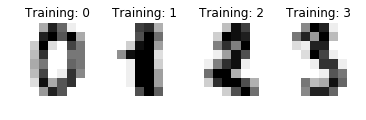

In [17]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [18]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data = data//data.max()
labels = digits.target

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size = 0.2, random_state=100)

In [31]:
xcount = np.ones((64,10)) #Laplace smoothing
ycount = np.ones(10)

In [32]:
for x,y in zip(Xtrain, Ytrain):
    ycount[y] +=1
    xcount[:,y] += x

In [33]:
proby = ycount/ycount.sum()
probx = xcount/ycount.reshape(1,10)

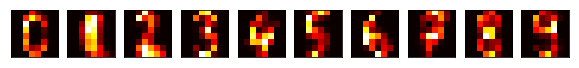

Class probabilities [0.09467865 0.10435384 0.09467865 0.10504492 0.10089841 0.10228058
 0.09813407 0.09744299 0.10228058 0.10020733]


In [34]:
fig, figarr = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((8, 8)), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)
plt.show()
print('Class probabilities', proby)

In [35]:
logpx = np.log(probx)
logpxneg = np.log(1.0-probx)
logpy = np.log(proby)
def bayespost(data):
    # We need to incorporate the prior probability p(y) since p(y|x) is
    # proportional to p(x|y) p(y)
    logpost = logpy.copy()
    logpost += (logpx * data + logpxneg * (1-data)).sum(axis=0)
    # Normalize to prevent overflow or underflow by subtracting the largest
    # value
    logpost -= np.max(logpost)
    # Compute the softmax using logpx
    post = np.exp(logpost)
    post /= np.sum(post)
    return post

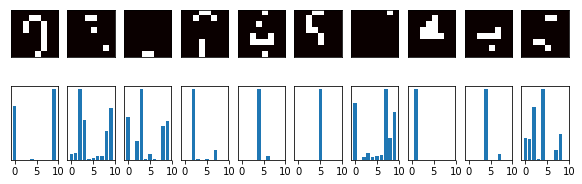

In [38]:
fig, figarr = plt.subplots(2, 10, figsize=(10, 3))
# Show 10 images
ctr = 0
for data, label in zip(Xtest,Ytest):
    x = data.reshape((64,1))
    y = int(label)
    post = bayespost(x)
    # Bar chart and image of digit
    figarr[1, ctr].bar(range(10), post)
    figarr[1, ctr].axes.get_yaxis().set_visible(False)
    figarr[0, ctr].imshow(x.reshape((8, 8)), cmap='hot')
    figarr[0, ctr].axes.get_xaxis().set_visible(False)
    figarr[0, ctr].axes.get_yaxis().set_visible(False)
    ctr += 1
    if ctr == 10:
        break
plt.show()

In [42]:
# Initialize counter
ctr = 0
err = 0
for data, label in zip(Xtest, Ytest):
    ctr += 1
    x = data.reshape((64,1))
    y = int(label)
    post = bayespost(x)
    if (post[y] < post.max()):
        err += 1
print('Naive Bayes has an accuracy of', (ctr-err)/ctr)

Naive Bayes has an accuracy of 0.7027777777777777
